In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import ast

In [146]:
df = pd.read_csv('cleaned_final_data.csv')

In [147]:
df['star_rating'] = pd.qcut(df['cum_review'], q=3, labels=[1, 2, 3])
print(df['star_rating'].value_counts())

1    6903
3    6835
2    6783
Name: star_rating, dtype: int64


In [148]:
df.head()

,Unnamed: 0,steam_appid,about_the_game,name,developer,publisher,owners,average_forever,average_2weeks,median_forever,...,price,initialprice,discount,ccu,languages,genre,tags,minimum,cum_review,star_rating
0,0,1002,Featuring a wide collection of single and mult...,Rag Doll Kung Fu,Mark Healey,Mark Healey,50000.0,15,0,29,...,99,99,0,0,English,Indie,"{'2D Fighter': 47, 'Martial Arts': 41, 'Intent...","Pentium3 800 MHz (or compatible), 256 MB RAM, ...",60,2
1,1,1200,Fight in the theatre of war that changed the w...,Red Orchestra: Ostfront 41-45,Tripwire Interactive,Tripwire Interactive,1000000.0,488,0,238,...,499,499,0,13,"English, French, Russian",Action,"{'World War II': 164, 'Action': 130, 'FPS': 12...",OS: Windows XP Processor: 1.2 GHZ or Equivalen...,1794,3
2,2,1300,"You are John Blade, commander of HardCorps, an...",SiN Episodes: Emergence,Ritual Entertainment,Ritual Entertainment,200000.0,112,0,175,...,999,999,0,3,"English, Russian, French",Action,"{'Action': 118, 'FPS': 76, 'Cyberpunk': 49, 'S...","1.2 GHz Processor, 256MB RAM, DirectX 7 level ...",874,3
3,3,1500,Combining fast-paced action with strategic bat...,Darwinia,Introversion Software,Introversion Software,200000.0,456,0,399,...,999,999,0,1,"English, German, French, Italian, Spanish - Spain","Indie, Strategy","{'Indie': 573, 'Tactical RPG': 445, ""Shoot 'Em...","Recommended: Windows XP, 600MHz CPU, 128MB RAM...",630,3
4,4,1520,"Inspired by the 1983 cult classic film, Wargam...",DEFCON,Introversion Software,Introversion Software,500000.0,172,0,34,...,999,999,0,16,"English, French, German, Italian, Spanish - Spain","Indie, Strategy","{'Cold War': 451, 'Wargame': 438, 'RTS': 431, ...","Recommended: Windows XP, P3-600-Geforce 2, 128...",2982,3


In [149]:
df.columns

Index(['Unnamed: 0', 'steam_appid', 'about_the_game', 'name', 'developer',
       'publisher', 'owners', 'average_forever', 'average_2weeks',
       'median_forever', 'median_2weeks', 'price', 'initialprice', 'discount',
       'ccu', 'languages', 'genre', 'tags', 'minimum', 'cum_review',
       'star_rating'],
      dtype='object')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20521 entries, 0 to 20520
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       20521 non-null  int64   
 1   steam_appid      20521 non-null  int64   
 2   about_the_game   20521 non-null  object  
 3   name             20521 non-null  object  
 4   developer        20521 non-null  object  
 5   publisher        20521 non-null  object  
 6   owners           20521 non-null  float64 
 7   average_forever  20521 non-null  int64   
 8   average_2weeks   20521 non-null  int64   
 9   median_forever   20521 non-null  int64   
 10  median_2weeks    20521 non-null  int64   
 11  price            20521 non-null  int64   
 12  initialprice     20521 non-null  int64   
 13  discount         20521 non-null  int64   
 14  ccu              20521 non-null  int64   
 15  languages        20521 non-null  object  
 16  genre            20521 non-null  object 

In [151]:
data['tags'][0]

"{'2D Fighter': 47, 'Martial Arts': 41, 'Intentionally Awkward Controls': 31, 'Physics': 30, 'Indie': 29, 'Multiplayer': 29, 'Fighting': 27, 'Singleplayer': 27, 'Action': 26, '2D': 18}"

In [152]:
data = df
data = data.groupby('star_rating', group_keys=False).apply(lambda x: x.sample(2500, replace=True))
data.reset_index(drop=True,inplace = True)
data = data.dropna()
data.reset_index(drop=True,inplace = True)


In [153]:
cat_features = ['genre', 'developer', 'publisher', 'languages']
cat_encoder = OneHotEncoder()
cat_data = pd.DataFrame(cat_encoder.fit_transform(data[cat_features]).toarray(),columns=cat_encoder.get_feature_names_out(cat_features))

tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = pd.DataFrame(tfidf.fit_transform(data['about_the_game']).toarray(), columns=tfidf.get_feature_names_out())


In [128]:
cat_data

,genre_Action,"genre_Action, Adventure","genre_Action, Adventure, Casual","genre_Action, Adventure, Casual, Free To Play, Early Access","genre_Action, Adventure, Casual, Free To Play, Indie","genre_Action, Adventure, Casual, Free To Play, Indie, Early Access","genre_Action, Adventure, Casual, Free To Play, Indie, Massively Multiplayer","genre_Action, Adventure, Casual, Free To Play, Indie, Massively Multiplayer, RPG","genre_Action, Adventure, Casual, Free To Play, Indie, Massively Multiplayer, Strategy, Movie","genre_Action, Adventure, Casual, Free To Play, Indie, RPG",...,"languages_Japanese, Traditional Chinese","languages_Russian, English","languages_Russian, English, French, Portuguese - Brazil, Spanish - Spain, Simplified Chinese, Polish, Ukrainian, Japanese",languages_Simplified Chinese,"languages_Simplified Chinese, English","languages_Simplified Chinese, English, Russian, Japanese","languages_Simplified Chinese, English, Traditional Chinese","languages_Simplified Chinese, Traditional Chinese",languages_Traditional Chinese,"languages_Traditional Chinese, Japanese, English, Simplified Chinese, Russian"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
tfidf_matrix

,000,01,02,03,04,07,10,100,1000,1006800,...,zeiva,zen,zero,zip,zombie,zombies,zone,zones,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.026631,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
7496,0.0,0.0,0.0,0.0,0.0,0.0,0.041787,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
7497,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.053509,0.000000,0.0,0.0
7498,0.0,0.0,0.0,0.0,0.0,0.0,0.057697,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [154]:
data['tags'] = data['tags'].apply(lambda x: ast.literal_eval(x))

In [130]:
tag_matrix

,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
tag_matrix = pd.get_dummies(data['tags'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else []).apply(pd.Series).stack()).sum(level=0)

processed_data = pd.concat([data[['owners', 'average_forever', 'price', 'discount']], cat_data, tfidf_matrix, tag_matrix], axis=1)

y = data['star_rating']  # or any target of interest


/tmp/ipykernel_5145/3926100236.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tag_matrix = pd.get_dummies(data['tags'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else []).apply(pd.Series).stack()).sum(level=0)
/tmp/ipykernel_5145/3926100236.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  tag_matrix = pd.get_dummies(data['tags'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else []).apply(pd.Series).stack()).sum(level=0)


In [157]:
processed_data.to_csv('naive_bayes_data.csv')

In [132]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(processed_data, y, test_size=0.2, random_state=42,stratify=data['star_rating'])

mnb = MultinomialNB()


mnb.fit(X_train, y_train)
mnb_score = mnb.score(X_test, y_test)

In [133]:
X_train

,owners,average_forever,price,discount,genre_Action,"genre_Action, Adventure","genre_Action, Adventure, Casual","genre_Action, Adventure, Casual, Free To Play, Early Access","genre_Action, Adventure, Casual, Free To Play, Indie","genre_Action, Adventure, Casual, Free To Play, Indie, Early Access",...,zeiva,zen,zero,zip,zombie,zombies,zone,zones,zoo,zoom
6941,20000.0,84,449,70,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
599,20000.0,0,299,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,200000.0,208,199,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6995,500000.0,233,299,70,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,20000.0,453,999,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,500000.0,298,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3106,20000.0,0,99,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2938,20000.0,0,99,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1536,20000.0,0,299,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
X_test

,owners,average_forever,price,discount,genre_Action,"genre_Action, Adventure","genre_Action, Adventure, Casual","genre_Action, Adventure, Casual, Free To Play, Early Access","genre_Action, Adventure, Casual, Free To Play, Indie","genre_Action, Adventure, Casual, Free To Play, Indie, Early Access",...,zeiva,zen,zero,zip,zombie,zombies,zone,zones,zoo,zoom
1152,500000.0,143,199,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
837,20000.0,123,199,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4932,20000.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,20000.0,0,399,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6517,50000.0,227,499,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,1000000.0,210,99,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4174,20000.0,0,499,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4613,20000.0,0,499,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5240,100000.0,282,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


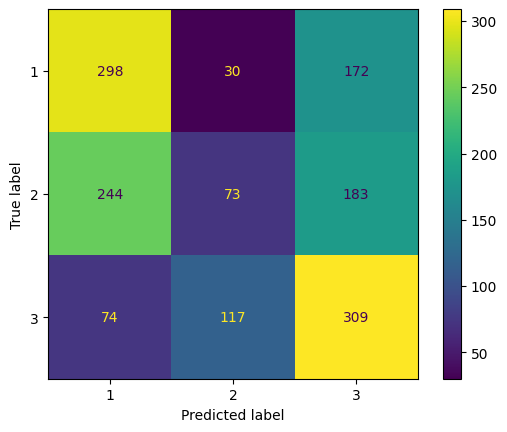

In [54]:

y_pred = mnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=mnb.classes_)
ConfusionMatrixDisplay(cm, display_labels=mnb.classes_).plot()

In [59]:
from sklearn.metrics import accuracy_score


y_pred = mnb.predict(X_test)

accuracy_by_group = {}

for group in y_test.unique():
    group_mask = y_test == group
    group_y_test = y_test[group_mask]
    group_y_pred = y_pred[group_mask]
    
    accuracy = accuracy_score(group_y_test, group_y_pred)
    
    accuracy_by_group[group] = accuracy

for group, accuracy in accuracy_by_group.items():
    print(f'Accuracy for group {group}: {accuracy:.4f}')


Accuracy for group 1: 0.5960
Accuracy for group 2: 0.1460
Accuracy for group 3: 0.6180


In [63]:
data['tags']

0       {'Casual': 22, 'Nudity': 21, 'Sexual Content':...
1       {'Racing': 143, 'Realistic': 138, 'Cinematic':...
2       {'Action': 22, 'Indie': 22, 'Shoot 'Em Up': 13...
3       {'Action': 77, 'Indie': 71, 'Violent': 68, 'Ad...
4                 {'Adventure': 20, 'Indie': 20, 'VR': 7}
                              ...                        
7495            {'Action': 37, 'Indie': 34, 'Casual': 34}
7496    {'Indie': 66, 'Platformer': 58, 'Puzzle': 56, ...
7497    {'Farming Sim': 79, 'RPG': 65, 'Life Sim': 60,...
7498    {'Strategy': 67, 'Violent': 21, 'RTS': 17, 'Re...
7499    {'Western': 149, 'Action': 108, 'FPS': 90, 'Sh...
Name: tags, Length: 7500, dtype: object

In [60]:
tag_matrix

,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Accuracy for group 1: 0.7002
Accuracy for group 2: 0.1829
Accuracy for group 3: 0.6632


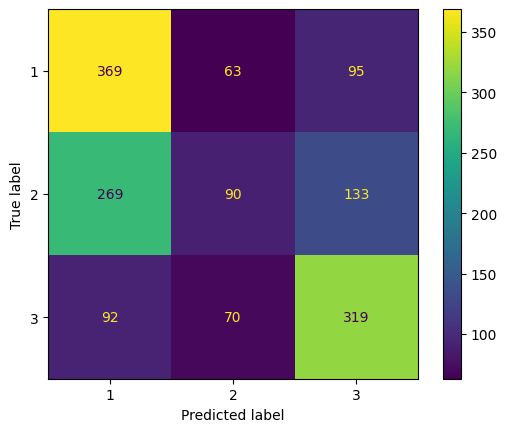

In [56]:
X_train_bnb, X_test_bnb, y_train_bnb, y_test_bnb = train_test_split(tag_matrix, data['star_rating'], test_size=0.2, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train_bnb, y_train_bnb)

bnb_score = bnb.score(X_test_bnb, y_test_bnb)

y_pred = bnb.predict(X_test_bnb)

cm = confusion_matrix(y_test_bnb, y_pred, labels=mnb.classes_)
ConfusionMatrixDisplay(cm, display_labels=mnb.classes_).plot()

accuracy_by_group = {}

for group in y_test.unique():
    group_mask = y_test_bnb == group
    group_y_test = y_test_bnb[group_mask]
    group_y_pred = y_pred[group_mask]
    
    accuracy = accuracy_score(group_y_test, group_y_pred)
    
    accuracy_by_group[group] = accuracy

for group, accuracy in accuracy_by_group.items():
    print(f'Accuracy for group {group}: {accuracy:.4f}')


In [138]:
cat_features = ['genre', 'developer', 'publisher', 'languages']
filtered_data = {}

for feature in cat_features:
    value_counts = data[feature].value_counts()
    valid_categories = value_counts[value_counts > 9].index.tolist()
    
    filtered_data[feature] = data[feature].apply(lambda x: x if x in valid_categories else 'Other')

cat_encoder = OneHotEncoder(sparse=False)
cat_data = pd.DataFrame(cat_encoder.fit_transform(pd.DataFrame(filtered_data)), columns=cat_encoder.get_feature_names_out())


/home/taps/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [139]:
cat_data.head(10)

,genre_Action,"genre_Action, Adventure","genre_Action, Adventure, Casual","genre_Action, Adventure, Casual, Indie","genre_Action, Adventure, Casual, Indie, RPG","genre_Action, Adventure, Casual, Indie, Simulation","genre_Action, Adventure, Casual, Indie, Strategy","genre_Action, Adventure, Free To Play, Indie","genre_Action, Adventure, Indie","genre_Action, Adventure, Indie, Early Access",...,"languages_English, Russian, Ukrainian","languages_English, Simplified Chinese","languages_English, Simplified Chinese, Japanese","languages_English, Simplified Chinese, Russian","languages_English, Simplified Chinese, Traditional Chinese","languages_English, Spanish - Spain","languages_English, Traditional Chinese","languages_English, Traditional Chinese, Japanese","languages_English, Turkish",languages_Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Accuracy for group 2: 0.2440
Accuracy for group 3: 0.5400
Accuracy for group 1: 0.5900


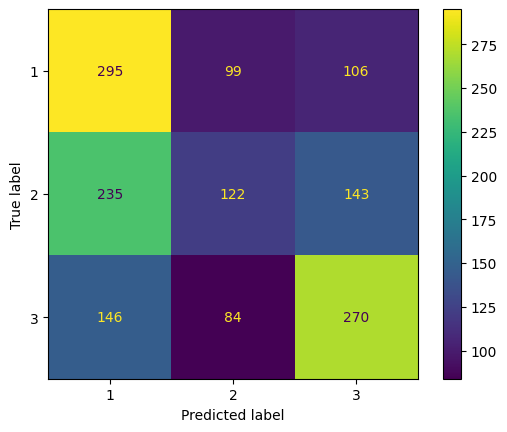

In [140]:
X_train_cnb, X_test_cnb, y_train_cnb, y_test_cnb = train_test_split(cat_data, data['star_rating'], test_size=0.2, random_state=43, stratify=data['star_rating'])

cnb = CategoricalNB()
cnb.fit(X_train_cnb, y_train_cnb)

y_pred = cnb.predict(X_test_cnb)

cm = confusion_matrix(y_test_cnb, y_pred, labels=mnb.classes_)
ConfusionMatrixDisplay(cm, display_labels=mnb.classes_).plot()

accuracy_by_group = {}

for group in y_test_cnb.unique():
    group_mask = y_test_cnb == group
    group_y_test = y_test_cnb[group_mask]
    group_y_pred = y_pred[group_mask]
    
    accuracy = accuracy_score(group_y_test, group_y_pred)
    
    accuracy_by_group[group] = accuracy

for group, accuracy in accuracy_by_group.items():
    print(f'Accuracy for group {group}: {accuracy:.4f}')

In [158]:

data = df
numeric_features = ['owners', 'average_forever', 'price', 'discount']

cat_features = ['genre', 'developer', 'publisher', 'languages']
for feature in cat_features:
    value_counts = data[feature].value_counts()
    valid_categories = value_counts[value_counts > 10].index.tolist()
    data[feature] = data[feature].apply(lambda x: x if x in valid_categories else 'Other')

cat_encoder = OneHotEncoder(sparse=False)
cat_data = pd.DataFrame(cat_encoder.fit_transform(data[cat_features]), columns=cat_encoder.get_feature_names_out(cat_features))

X = pd.concat([data[['owners', 'average_forever', 'price', 'discount']], cat_data], axis=1)
y = data['star_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scaler = StandardScaler()
# X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# tree1 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
# tree1.fit(X_train, y_train)
# plt.figure(figsize=(20, 10))
# plot_tree(tree1, feature_names=X.columns, filled=True)
# plt.title("Tree 1: Gini Criterion, Max Depth = 5")
# plt.show()

# tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=None, max_features=0.5, random_state=42)
# tree2.fit(X_train, y_train)
# plt.figure(figsize=(20, 10))
# plot_tree(tree2, feature_names=X.columns, filled=True)
# plt.title("Tree 2: Entropy Criterion, No Max Depth, Max Features = 0.5")
# plt.show()

# tree3 = DecisionTreeClassifier(criterion='gini', max_depth=3, max_features="sqrt", random_state=42)
# tree3.fit(X_train, y_train)
# plt.figure(figsize=(20, 10))
# plot_tree(tree3, feature_names=X.columns, filled=True)
# plt.title("Tree 3: Gini Criterion, Max Depth = 3, Max Features = sqrt")
# plt.show()


/home/taps/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [159]:
X.to_csv('decision_tree_data.csv')

In [142]:
X

,owners,average_forever,price,discount,genre_Action,"genre_Action, Adventure","genre_Action, Adventure, Casual","genre_Action, Adventure, Casual, Indie","genre_Action, Adventure, Casual, Indie, Early Access","genre_Action, Adventure, Casual, Indie, RPG",...,"languages_English, Simplified Chinese, Traditional Chinese","languages_English, Simplified Chinese, Traditional Chinese, Japanese","languages_English, Spanish - Spain","languages_English, Spanish - Spain, Russian","languages_English, Traditional Chinese","languages_English, Traditional Chinese, Japanese","languages_English, Traditional Chinese, Simplified Chinese","languages_English, Turkish",languages_Other,languages_Simplified Chinese
0,50000.0,15,99,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000000.0,488,499,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,200000.0,112,999,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,200000.0,456,999,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,500000.0,172,999,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20516,20000.0,0,399,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20517,20000.0,0,99,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20518,20000.0,0,99,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20519,20000.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
X_train

,owners,average_forever,price,discount,genre_Action,"genre_Action, Adventure","genre_Action, Adventure, Casual","genre_Action, Adventure, Casual, Indie","genre_Action, Adventure, Casual, Indie, Early Access","genre_Action, Adventure, Casual, Indie, RPG",...,"languages_English, Simplified Chinese, Traditional Chinese","languages_English, Simplified Chinese, Traditional Chinese, Japanese","languages_English, Spanish - Spain","languages_English, Spanish - Spain, Russian","languages_English, Traditional Chinese","languages_English, Traditional Chinese, Japanese","languages_English, Traditional Chinese, Simplified Chinese","languages_English, Turkish",languages_Other,languages_Simplified Chinese
7442,1000000.0,2242,1999,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10266,50000.0,103,999,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3824,20000.0,0,499,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7902,20000.0,570,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5409,200000.0,122,199,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19090,20000.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5565,20000.0,179,499,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7321,100000.0,236,299,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2229,100000.0,14,299,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
X_test

,owners,average_forever,price,discount,genre_Action,"genre_Action, Adventure","genre_Action, Adventure, Casual","genre_Action, Adventure, Casual, Indie","genre_Action, Adventure, Casual, Indie, Early Access","genre_Action, Adventure, Casual, Indie, RPG",...,"languages_English, Simplified Chinese, Traditional Chinese","languages_English, Simplified Chinese, Traditional Chinese, Japanese","languages_English, Spanish - Spain","languages_English, Spanish - Spain, Russian","languages_English, Traditional Chinese","languages_English, Traditional Chinese, Japanese","languages_English, Traditional Chinese, Simplified Chinese","languages_English, Turkish",languages_Other,languages_Simplified Chinese
13132,50000.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19516,50000.0,0,199,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11960,20000.0,0,899,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13177,50000.0,207,99,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13503,50000.0,1313,1999,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6675,20000.0,0,599,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7988,20000.0,0,999,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,500000.0,436,999,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3511,100000.0,78,499,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Accuracy for group 2: 0.3397
Accuracy for group 3: 0.7783
Accuracy for group 1: 0.6980


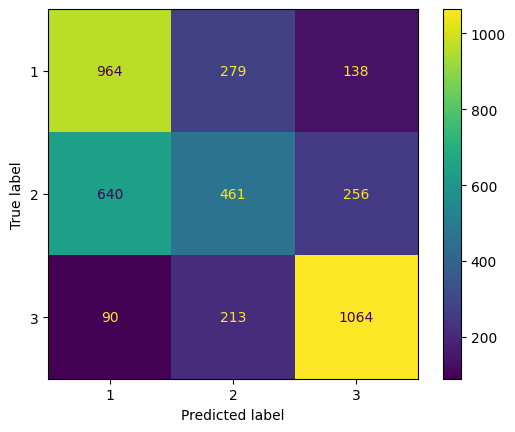

In [79]:

y_pred = tree1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=tree1.classes_).plot()

accuracy_by_group = {}

for group in y_test_cnb.unique():
    group_mask = y_test == group
    group_y_test = y_test[group_mask]
    group_y_pred = y_pred[group_mask]
    
    accuracy = accuracy_score(group_y_test, group_y_pred)
    
    accuracy_by_group[group] = accuracy

for group, accuracy in accuracy_by_group.items():
    print(f'Accuracy for group {group}: {accuracy:.4f}')


Accuracy for group 2: 0.4075
Accuracy for group 3: 0.7030
Accuracy for group 1: 0.6198


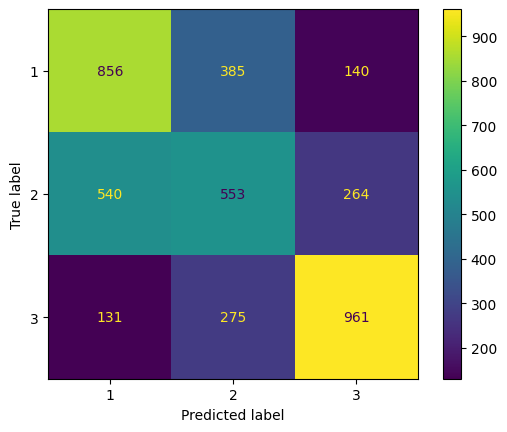

In [80]:

y_pred = tree2.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=tree2.classes_).plot()

accuracy_by_group = {}

for group in y_test_cnb.unique():
    group_mask = y_test == group
    group_y_test = y_test[group_mask]
    group_y_pred = y_pred[group_mask]
    
    accuracy = accuracy_score(group_y_test, group_y_pred)
    
    accuracy_by_group[group] = accuracy

for group, accuracy in accuracy_by_group.items():
    print(f'Accuracy for group {group}: {accuracy:.4f}')

Accuracy for group 2: 0.0000
Accuracy for group 3: 0.0168
Accuracy for group 1: 0.9986


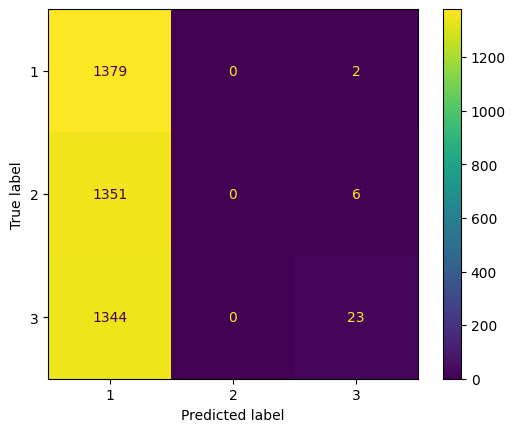

In [81]:
y_pred = tree3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=tree3.classes_).plot()
accuracy_by_group = {}

for group in y_test_cnb.unique():
    group_mask = y_test == group
    group_y_test = y_test[group_mask]
    group_y_pred = y_pred[group_mask]
    
    accuracy = accuracy_score(group_y_test, group_y_pred)
    
    accuracy_by_group[group] = accuracy

for group, accuracy in accuracy_by_group.items():
    print(f'Accuracy for group {group}: {accuracy:.4f}')

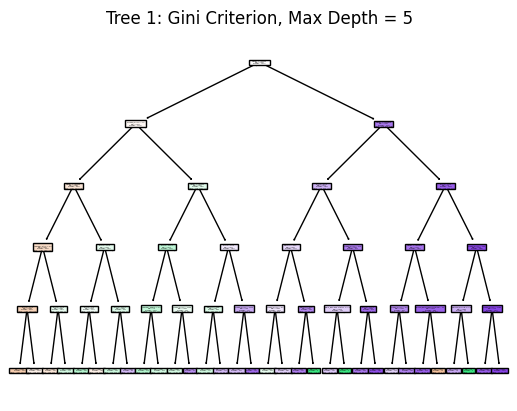

In [87]:
plot_tree(tree1, feature_names=X.columns, filled=True)
plt.title("Tree 1: Gini Criterion, Max Depth = 5")
plt.savefig("tree1_gini_maxdepth5.png", dpi=600, bbox_inches='tight')  # Save with high DPI and tight layout


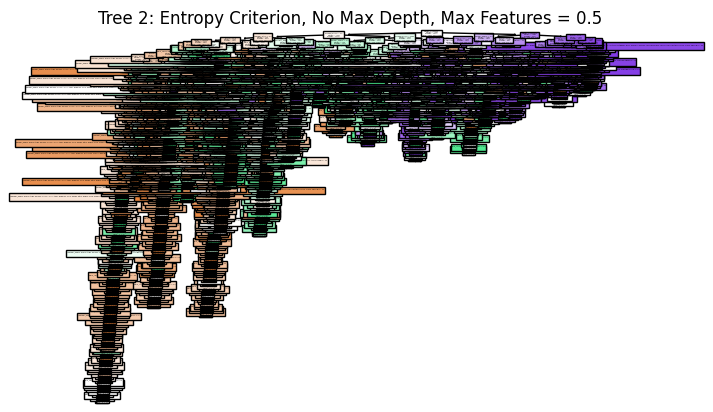

In [85]:
plot_tree(tree2, feature_names=X.columns, filled=True)
plt.title("Tree 2: Entropy Criterion, No Max Depth, Max Features = 0.5")
plt.savefig("tree1_gini_no_maxdepth.png", dpi=600, bbox_inches='tight')  # Save with high DPI and tight layout


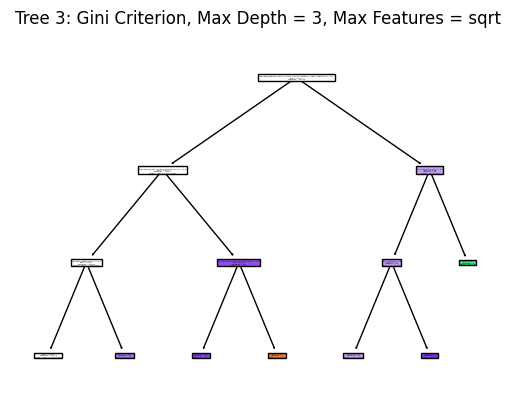

In [86]:
plot_tree(tree3, feature_names=X.columns, filled=True)
plt.title("Tree 3: Gini Criterion, Max Depth = 3, Max Features = sqrt")
plt.savefig("tree1_gini_no_maxdepth3.png", dpi=600, bbox_inches='tight')  # Save with high DPI and tight layout


In [90]:
import pandas as pd
data = pd.read_csv('cleaned_final_data.csv')

In [91]:
data['star_rating'] = pd.qcut(data['cum_review'], q=2, labels=[1, 0])
print(data['star_rating'].value_counts())

1    10320
0    10201
Name: star_rating, dtype: int64


In [160]:

numeric_features = ['owners', 'average_forever', 'price']
cat_features = ['genre', 'developer', 'publisher', 'languages']
for feature in cat_features:
    value_counts = data[feature].value_counts()
    valid_categories = value_counts[value_counts > 10].index.tolist()
    data[feature] = data[feature].apply(lambda x: x if x in valid_categories else 'Other')

cat_encoder = OneHotEncoder(sparse=False)
cat_data = pd.DataFrame(cat_encoder.fit_transform(data[cat_features]), columns=cat_encoder.get_feature_names_out(cat_features))

X = pd.concat([data[['owners', 'average_forever', 'price', 'discount']], cat_data], axis=1)
# y = data['star_rating']
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# scaler = MinMaxScaler()

# X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)
# y_pred_log_reg = log_reg.predict(X_test)
# accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
# conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
# print("Logistic Regression Confusion Matrix:")
# print(conf_matrix_log_reg)

# mnb = MultinomialNB()
# mnb.fit(X_train, y_train)
# y_pred_mnb = mnb.predict(X_test)
# accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
# conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)

# print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb}")
# print("Multinomial Naive Bayes Confusion Matrix:")
# print(conf_matrix_mnb)


/home/taps/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [161]:
X.to_csv('logisticr_reg.csv')

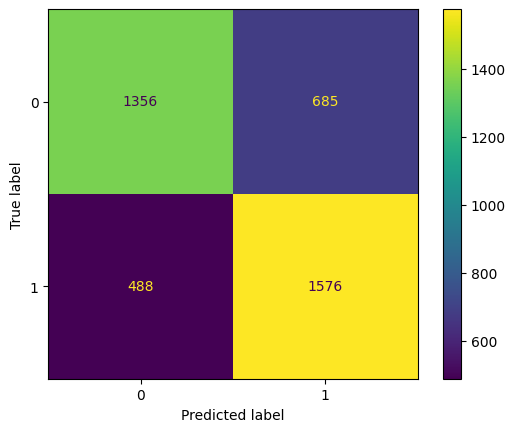

In [113]:
ConfusionMatrixDisplay(conf_matrix_log_reg, display_labels=log_reg.classes_).plot()


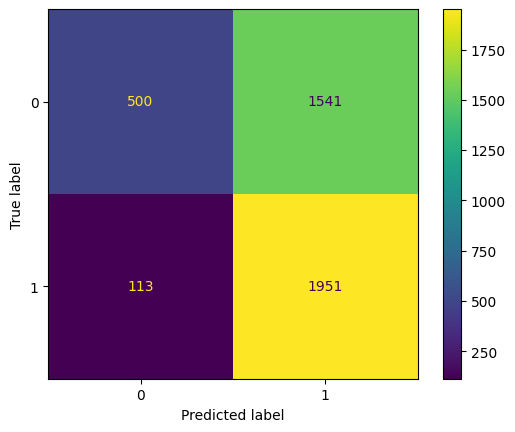

In [114]:
ConfusionMatrixDisplay(conf_matrix_mnb, display_labels=mnb.classes_).plot()
